Question 03 - Gamma Correction

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [69]:
input_image_path = Path("../data/a1images/highlights_and_shadows.jpg") 
output_folder    = Path("../data/output_images")
os.makedirs(output_folder, exist_ok=True)

out_img            = output_folder / "q3_gamma_corrected.png"

In [70]:
img_bgr = cv.imread(str(input_image_path), cv.IMREAD_COLOR)
if img_bgr is None:
    raise FileNotFoundError(f"Could not find {input_image_path}")

In [71]:
lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)        # L is 0..255 in OpenCV's 8-bit Lab

In [72]:
# gamma on L only - use LUT for speed/reproducibility
gamma = 0.75                    
lut = np.array([((i/255.0)**gamma)*255.0 for i in range(256)], dtype=np.uint8)
L_corr = cv.LUT(L, lut)

In [73]:
# recombine and back to BGR 
lab_corr   = cv.merge([L_corr, a, b])
img_corr   = cv.cvtColor(lab_corr, cv.COLOR_LAB2BGR)
img_rgb    = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
img_corr_r = cv.cvtColor(img_corr, cv.COLOR_BGR2RGB)

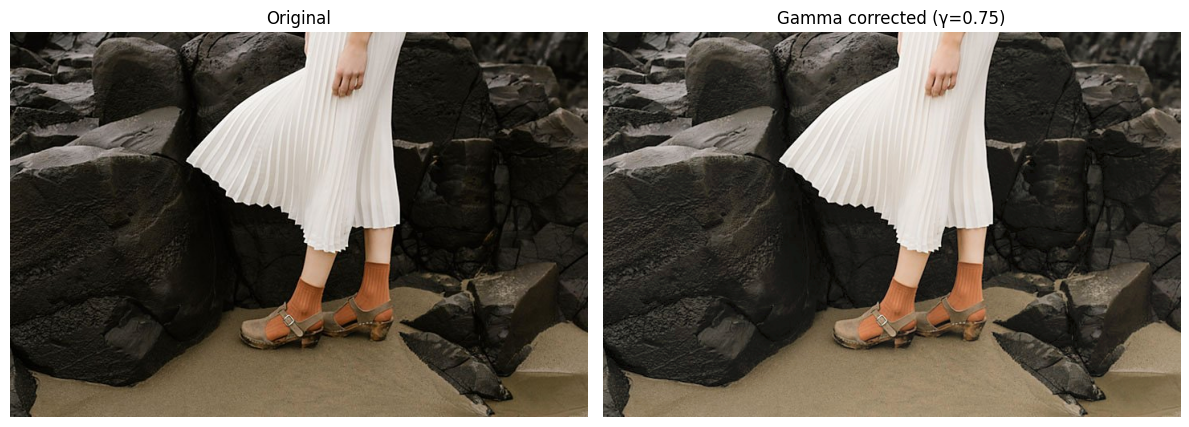

True

In [74]:
# show and save comparison
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img_rgb);    plt.title("Original");            plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_corr_r); plt.title(f"Gamma corrected (γ={gamma})"); plt.axis("off")
plt.tight_layout(); plt.show()
cv.imwrite(str(out_img), img_corr)

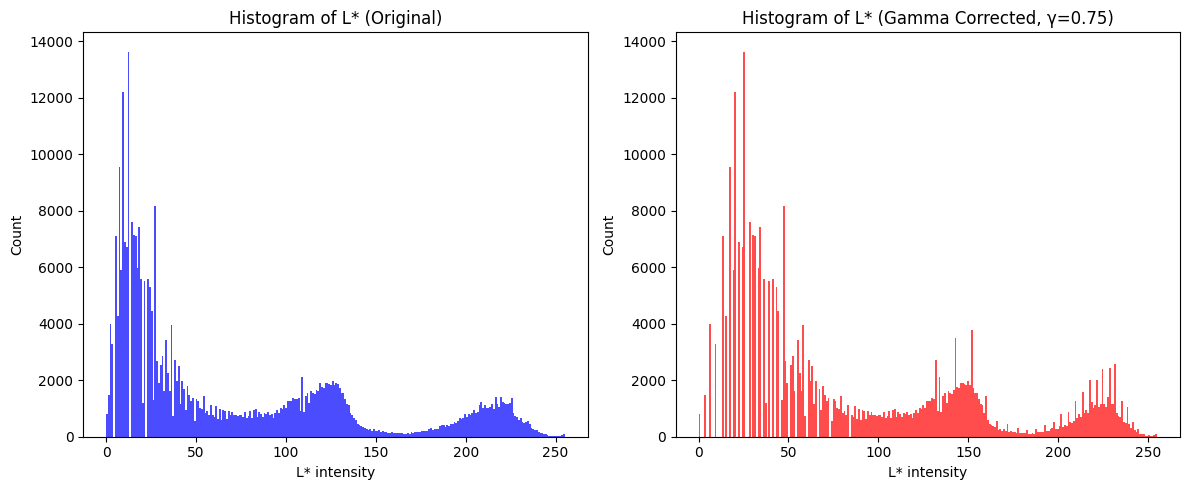

In [75]:
# histogram visualization 
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].hist(L.ravel(), bins=256, range=(0,255), color='blue', alpha=0.7)
axes[0].set_title("Histogram of L* (Original)")
axes[0].set_xlabel("L* intensity")
axes[0].set_ylabel("Count")

axes[1].hist(L_corr.ravel(), bins=256, range=(0,255), color='red', alpha=0.7)
axes[1].set_title(f"Histogram of L* (Gamma Corrected, γ={gamma})")
axes[1].set_xlabel("L* intensity")
axes[1].set_ylabel("Count")

plt.tight_layout()

fig.savefig(output_folder / "q3_L_histograms_side_by_side.png", dpi=150)
plt.show()
